# Health Metrics for Tracking Habits and Wellness

## Objective

This is a simple representation in how to analyze and process some simple health metrics. Since this type of data is often quite private, we will start with a limited amount of features that still maintains privacy for the individual, who theoretically is to upload personal data to this model. 

> Of note, there will be trade-offs. For instance, we ought to articulate the cost versus benefits for the individual. We must ask some rhetorical questions.

1. What is the SKew?
2. What ...
3. ....
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import Timer

#supervised
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

#clustering 
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import euclidean, cityblock
from sklearn.metrics.pairwise import cosine_similarity


## Data Understanding 


We have a simple data frame which tracks a few of the key features presented through the Oura application

In [2]:
data = '../input/oura-health-data-analysis-one-year-period/oura_2019_trends.csv'

df = pd.read_csv(data)

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
       average_rhr  sleep_score  activity_score  readiness_score
count   241.000000   241.000000      296.000000       267.000000
mean     60.153631    78.000000       91.199324        78.194757
std       8.047604     9.396365        7.699271        11.621841
min      45.750000    46.000000       54.000000        36.000000
25%      54.500000    73.000000       88.750000        70.000000
50%      58.650000    80.000000       93.000000        80.000000
75%      64.240000    85.000000       97.000000        87.000000
max      88.970000    98.000000      100.000000        96.000000


## Pre-Processing & Cleaning for Data Frame

1. Convert
2. Remove
3. TODO: NA Values??? 
    a. To Impute
    b. To remove


In [3]:
#1 Convert 

# convert to datetime format #removes unecessary column 
df['date'] = pd.to_datetime(df['date'])

# Set'date' as index column 
df.set_index('date', inplace=True)

#2 Remove
#Sanity check
df = df.drop_duplicates()

#3 NA
# Check for missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

# TODO: impute rows where all columns are null
df.dropna(inplace=True)


print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
average_rhr        47
sleep_score        47
activity_score      4
readiness_score    21
dtype: int64

Missing values in the DataFrame:
average_rhr        0
sleep_score        0
activity_score     0
readiness_score    0
dtype: int64


In [4]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())



Summary statistics of numerical columns:
       average_rhr  sleep_score  activity_score  readiness_score
count   238.000000   238.000000      238.000000       238.000000
mean     60.201786    77.945378       91.306723        78.210084
std       8.068780     9.343941        7.475024        11.370162
min      45.750000    46.000000       68.000000        36.000000
25%      54.500000    73.000000       89.000000        70.000000
50%      58.825000    80.000000       93.000000        80.000000
75%      64.562500    85.000000       97.000000        87.000000
max      88.970000    98.000000      100.000000        96.000000


## Visualizations 


Histograms of numerical columns:


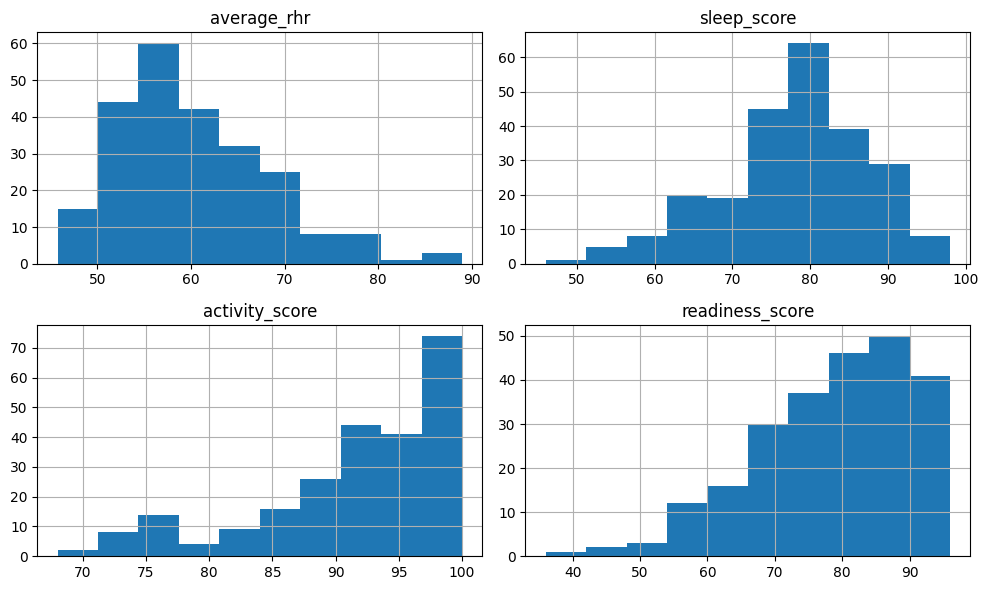


Correlation heatmap:


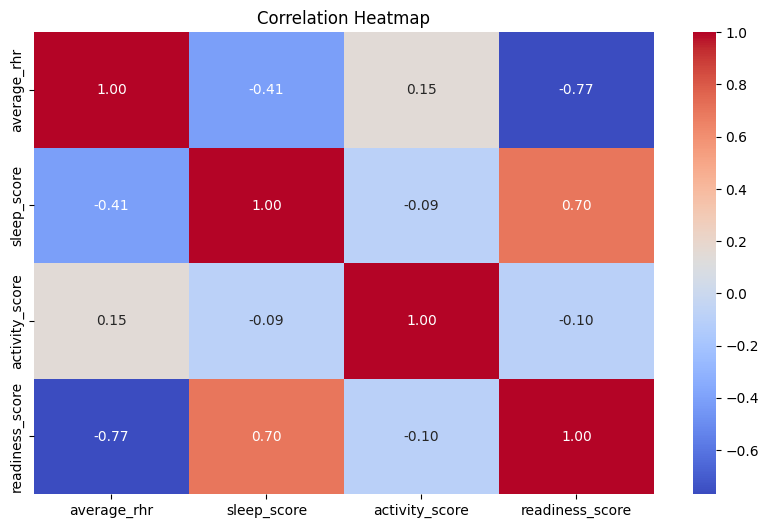

In [5]:
# Visualize the distribution of numerical columns using histograms
print("\nHistograms of numerical columns:")
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Visualize the correlation between numerical columns using a heatmap
print("\nCorrelation heatmap:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## TODO: Scaling of RHR
    a. Remove or Scale in accordance with other variables? 

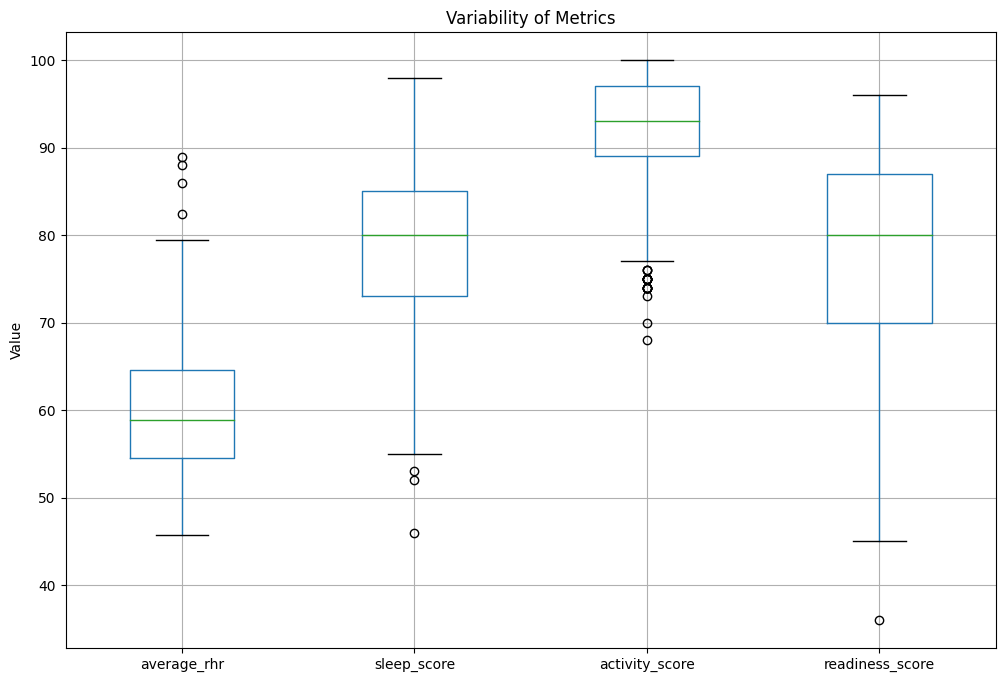

In [6]:
#Box Plot 
plt.figure(figsize=(12, 8))
df.boxplot(column=['average_rhr', 'sleep_score', 'activity_score', 'readiness_score'])
plt.title('Variability of Metrics')
plt.ylabel('Value')
plt.show()

# Checkmark: Cleaned CSV

In [7]:
df.to_csv('cleaned_data.csv', index=False)

## Clustering...

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
   average_rhr  sleep_score  activity_score  readiness_score
0    56.456271    82.347458       94.338983        84.847458
1    67.948291    69.253165       93.227848        65.670886
2    56.055366    82.024390       78.878049        83.268293

Cluster Counts:
cluster
0    118
1     79
2     41
Name: count, dtype: int64


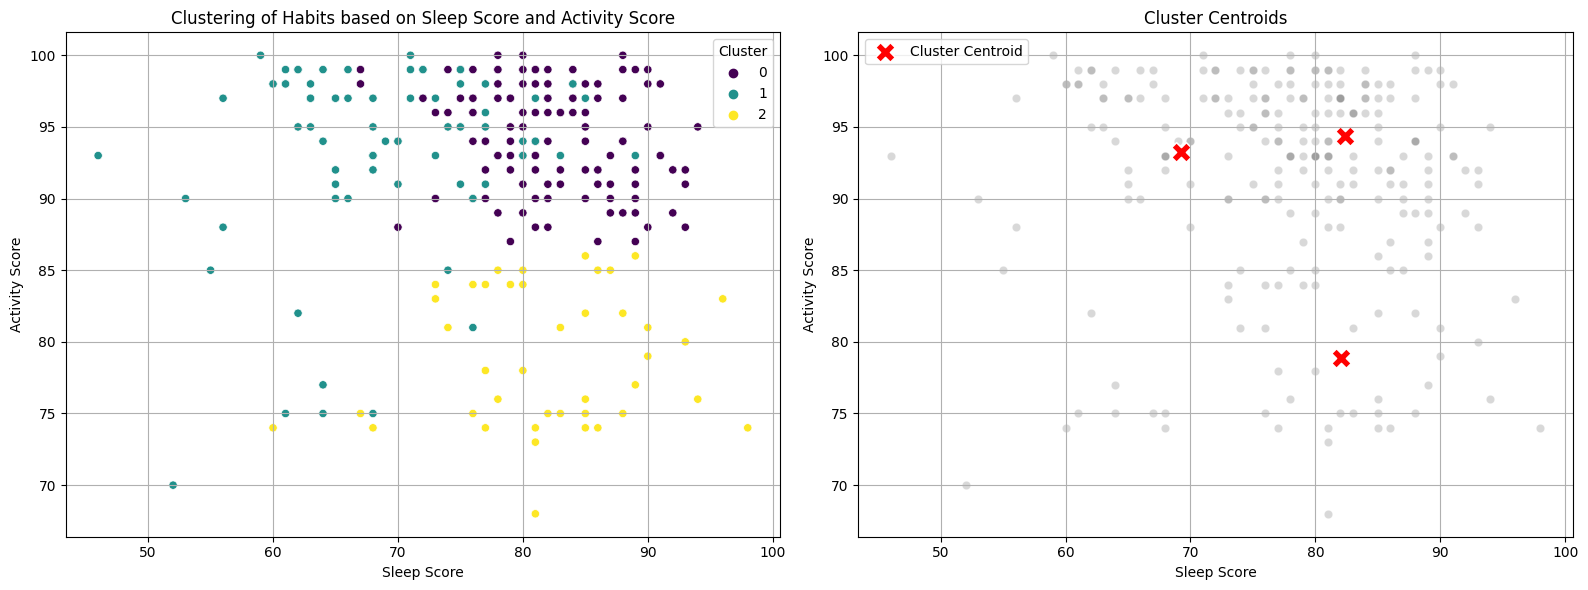

In [8]:
#TODO: de-duplicate imputing or use imputer below on an unimputed data frame from above

#Handling missing values by imputing with column means
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_imputed)

# Apply K-means algorithm
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=11)
clusters = kmeans.fit_predict(df_normalized)

# Assign cluster labels back to the DataFrame
df_imputed['cluster'] = clusters

# Print cluster centers
print("Cluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns))

# Analyze clusters
cluster_counts = df_imputed['cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)

# Scatter plot of clusters
plt.figure(figsize=(16, 6))

# Subplot 1: Scatter plot of clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x='sleep_score', y='activity_score', hue='cluster', data=df_imputed, palette='viridis')
plt.title('Clustering of Habits based on Sleep Score and Activity Score')
plt.xlabel('Sleep Score')
plt.ylabel('Activity Score')
plt.legend(title='Cluster')
plt.grid(True)

# Visualizing cluster centroids
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns)

# Subplot 2: Visualizing cluster centroids
plt.subplot(1, 2, 2)
sns.scatterplot(x='sleep_score', y='activity_score', data=df_imputed, color='gray', alpha=0.3)
sns.scatterplot(x='sleep_score', y='activity_score', data=cluster_centers, s=200, color='red', marker='X', label='Cluster Centroid')
plt.title('Cluster Centroids')
plt.xlabel('Sleep Score')
plt.ylabel('Activity Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
# Compute silhouette score
silhouette = silhouette_score(df_normalized, clusters)

# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df_normalized, clusters)

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(df_normalized, clusters)

# Compute pairwise distances between cluster centroids
centroid_distances = []
for i in range(len(cluster_centers)):
    for j in range(i + 1, len(cluster_centers)):
        centroid_distances.append(euclidean(cluster_centers.iloc[i], cluster_centers.iloc[j]))
#By using iloc[i] and iloc[j], we access the DataFrame rows by their positional index, ensuring 

# Compute average pairwise centroid distance
average_centroid_distance = sum(centroid_distances) / len(centroid_distances)

# Compute cosine similarity between cluster centroids
cosine_similarities = cosine_similarity(cluster_centers)

# Print similarity and dissimilarity metrics
print("Similarity Metrics:")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("\nDissimilarity Metrics:")
print("Average Pairwise Centroid Distance:", average_centroid_distance)
print("Cosine Similarities between Cluster Centroids:")
print(cosine_similarities)

Similarity Metrics:
Silhouette Score: 0.31879371729850964
Davies-Bouldin Index: 1.0873189242290822
Calinski-Harabasz Index: 127.7570768486883

Dissimilarity Metrics:
Average Pairwise Centroid Distance: 23.373496025628196
Cosine Similarities between Cluster Centroids:
[[1.         0.98893626 0.99699023]
 [0.98893626 1.         0.98204042]
 [0.99699023 0.98204042 1.        ]]


# TODO: Model Linear Regression: 
Plot Average Heart Rate + Sleep Score  against Readiness

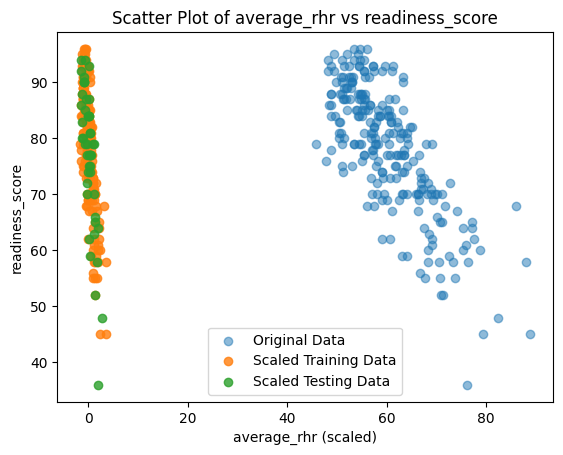

In [10]:
#TODO: Create multi-regression
# Extract features and target variable
features = ['average_rhr', 'sleep_score']
target = 'readiness_score'

X = df[features].values
y = df[target].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualization
plt.scatter(X[:, 0], y, alpha=0.5, label='Original Data')
plt.scatter(X_train_scaled[:, 0], y_train, alpha=0.8, label='Scaled Training Data')
plt.scatter(X_test_scaled[:, 0], y_test, alpha=0.8, label='Scaled Testing Data')
plt.title('Scatter Plot of average_rhr vs readiness_score')
plt.xlabel('average_rhr (scaled)')
plt.ylabel('readiness_score')
plt.legend()
plt.show()

# Sumarization

